# US Govt Fair Use Index Review

## Overview

- **Author**: [Etienne P Jacquot](mailto:etiennej@upenn.edu)
- **Date**: 02/24/2025
- **Course**: LAW-9580 Cybercrime (Penn Carey Law)

### Code Dependencies

- The following Python dependencies are required to run the code in this repository:

    ```bash
    pip install pandas
    pip install matplotlib
    pip install seaborn
    pip install openpyxl
    ```

### Source Description

- Table copied from https://www.copyright.gov/fair-use/fair-index.html on February 24th, 2025.
    - Saved as excel file: [USGOVT_FairUseIndex_02-24-2025.xlsx](USGOVT_FairUseIndex_02-24-2025.xlsx)

- Data consists of **6 Columns** available for **250 rows**: 
    - `Index(['Case', 'Year', 'Court', 'Jurisdiction', 'Categories', 'Outcome'], dtype='object')`

### Data Analysis

The below analysis is performed on the data to understand the distribution of the cases across the years, courts, jurisdictions, categories and outcomes. Steps are taken to visualize the data for summarization of the US Govt Fair Use Index over time.



In [1]:
pip install nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 6.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 14.7 MB/s eta 0:00:00
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.8 MB/s eta 0:00:00
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 21.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('./USGOVT_FairUseIndex_02-24-2025.xlsx')

In [4]:
# Make sure there are no missing rows or values from data file
assert(df[df.Case.isna()].shape == (0, df.columns.size))
assert(df[df.Year.isna()].shape == (0, df.columns.size))
assert(df[df.Court.isna()].shape == (0, df.columns.size))
assert(df[df.Jurisdiction.isna()].shape == (0, df.columns.size))
assert(df[df.Categories.isna()].shape == (0, df.columns.size))
assert(df[df.Outcome.isna()].shape == (0, df.columns.size))

_______________

## Ploting the Data for US Govt Fair Use Index

<Axes: ylabel='Outcome'>

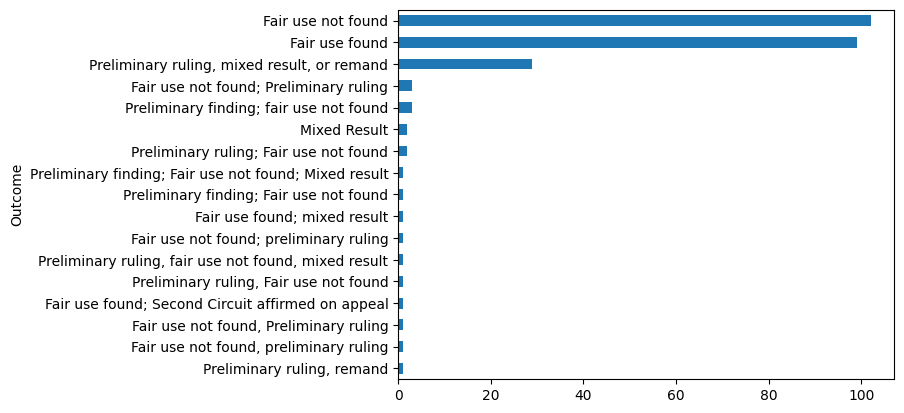

In [5]:
df['Outcome'].value_counts(ascending=True).plot(kind='barh')

<Axes: ylabel='Court'>

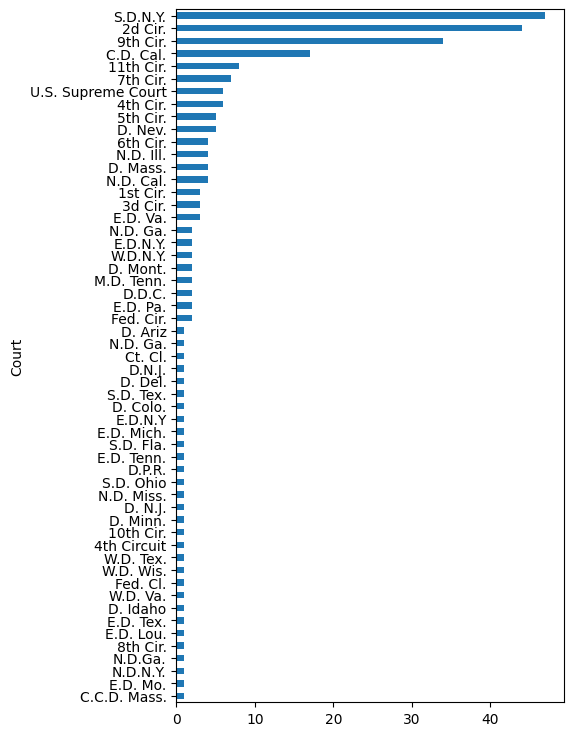

In [6]:
df['Court'].value_counts(ascending=True).plot(kind='barh', figsize=(5,9), label='Court')

In [7]:
# Cleaning up the year column for inconsistent integer values
df['Year'] = df['Year'].replace('2017, affirmed 2018', '2018')

In [8]:
# Set Year as integer values
df['Year'] = df['Year'].astype(int)

Text(0.5, 1.0, 'Number of Fair Use Case Index Refs per Year (1950-2025)')

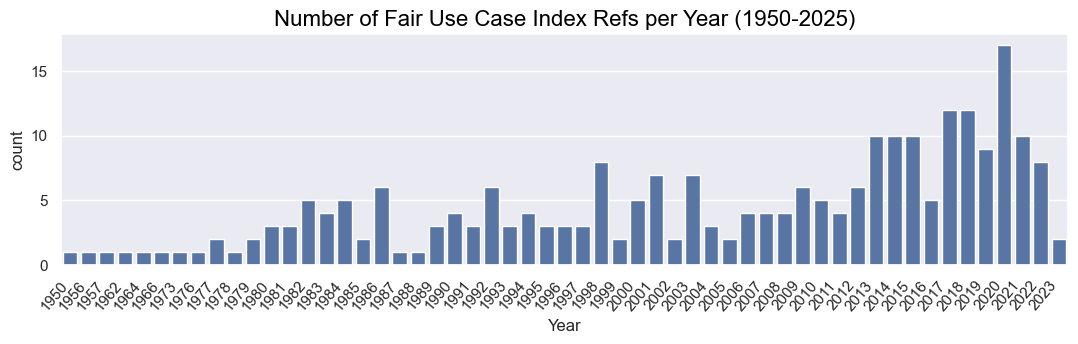

In [86]:
# Bar plot of the number of cases per year
#df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,2.5), label='Year')
# seaborn bar plot of the number of cases per year

title='Number of Fair Use Case Index Refs per Year (1950-2025)'
sns.set(rc={'figure.figsize':(13,3)})
sns.set_style("darkgrid")
plt.xticks(rotation=50, ha='right')
sns.countplot(data=df[df['Year'] >= 1950], x='Year').set_title(title, fontsize=16, color='black')


Text(0.5, 1.0, 'Number of Fair Use Case Index Refs per Year (ignoring years before (1950-2025)')

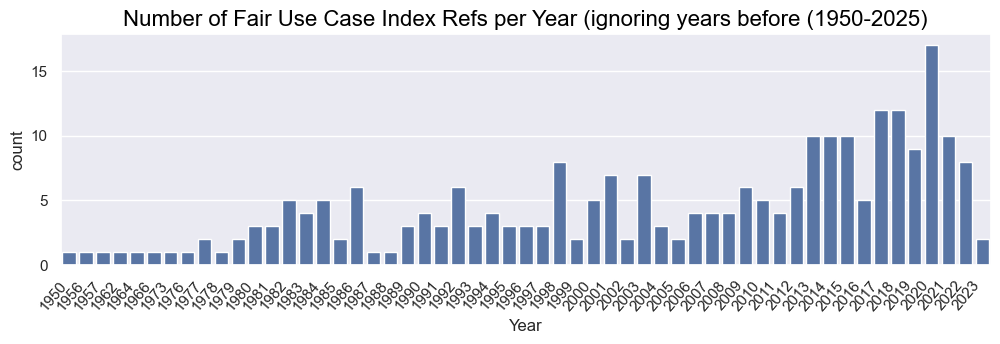

In [87]:
# Bar plot of the number of cases per year
#df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,2.5), label='Year')
# seaborn bar plot of the number of cases per year

title='Number of Fair Use Case Index Refs per Year (ignoring years before (1950-2025)'
sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("darkgrid")
plt.xticks(rotation=50, ha='right')
sns.countplot(data=df[df['Year'] >= 1950], x='Year').set_title(title, fontsize=16, color='black')
# instead of a countplot, do a line plot
#sns.lineplot(data=df[df['Year'] >= 1950]['Year'].value_counts().sort_index()).set_title(title, fontsize=16, color='black')

In [11]:
# Set a new column as Decades column
df['Decade'] = (df['Year'] // 10) * 10
# fill in missing decades with 0, so take the lowest value as the first decade, then increment by 10 for each decade
df['Decade'] = df['Decade'].fillna(0).astype(int)
# filling in missing decades
decades_over_time = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

Text(0.5, 1.0, '# of Fair Use Cases Index Refs per Decade')

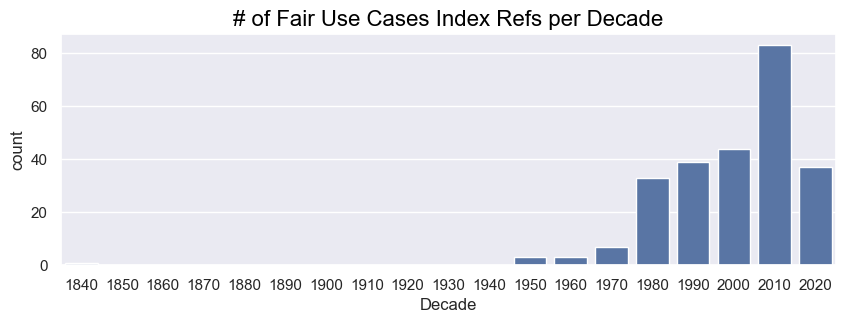

In [88]:
# Bar plot of the number of cases per decade (including missing values)
#df.Decade.value_counts().reindex(decades_over_time).plot(kind='bar', figsize=(10,2.5), label='Decade')

sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("darkgrid")
title='# of Fair Use Cases Index Refs per Decade'
sns.countplot(x='Decade', data=df, order=decades_over_time).set_title(title, fontsize=16, color='black')



Text(0.5, 1.0, '# of Fair Use Cases Index Refs per Decade (Condensed)')

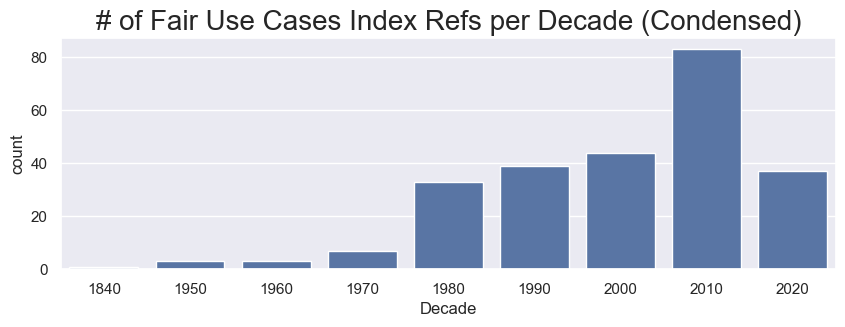

In [89]:
# Plot the number of cases per decade
#df['Decade'].value_counts().sort_index().plot(kind='bar', figsize=(5,3), label='Decade')
# seaborn
# Bar plot of the number of cases per decade (including missing values)
#df.Decade.value_counts().reindex(decades_over_time).plot(kind='bar', figsize=(10,2.5), label='Decade')
# seaborn sort on reindexed decades_over_time, make it wider, and add a title
# change degree of x axis labels
sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("darkgrid")
sns.countplot(x='Decade', data=df).set_title('# of Fair Use Cases Index Refs per Decade (Condensed)', fontsize=20)



Text(0.5, 1.0, 'Fair Use Case Index Outcomes (Totals)')

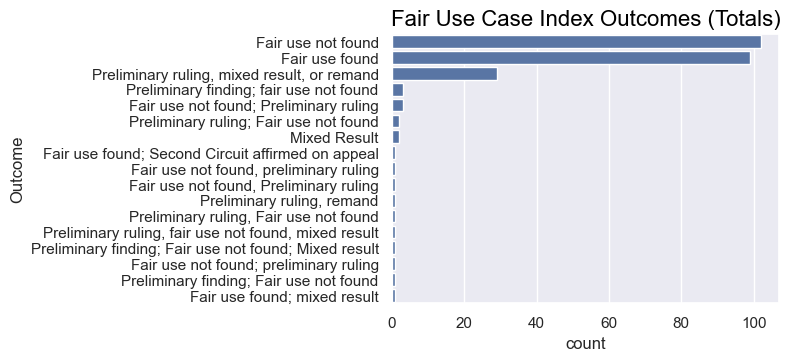

In [14]:
#df['Outcome'].value_counts(ascending=True).plot(kind='barh', figsize=(5,3), label='Outcome')
# seaborn plot sorted by value count of df.Outcome
sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Outcomes (Totals)'
sns.countplot(data=df, y='Outcome', order=df['Outcome'].value_counts().index).set_title(title, fontsize=16, color='black')

In [15]:
# Assertion for sanity checking that all values are accounted for in three main categories
fair_use_total = df[df.Outcome.str.contains('FAIR USE FOUND', case=False)].shape[0]
fair_not_total = df[df.Outcome.str.contains('FAIR USE NOT FOUND', case=False)].shape[0]
fair_alt_total = df[ ~ df['Outcome'].str.contains('FAIR USE', case=False)].shape[0] 
assert(fair_use_total + fair_not_total + fair_alt_total == df.shape[0])

In [16]:
main_outcomes = ['FAIR USE FOUND', 'FAIR USE NOT FOUND', 'OTHER']
# Create a new column called 'Main Outcome' that contains only the main outcomes
df['Main Outcome'] = df['Outcome'].str.upper().apply(lambda x: 'FAIR USE FOUND' if 'FAIR USE FOUND' in x else ('FAIR USE NOT FOUND' if 'FAIR USE NOT FOUND' in x else 'OTHER'))


Text(0.5, 1.0, 'Fair Use Case Index Outcomes (Main Categories Summary)')

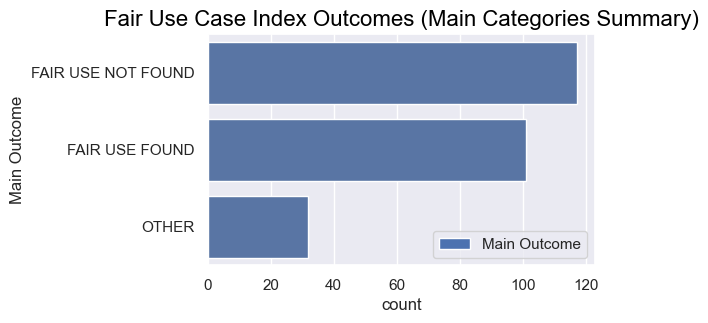

In [17]:
# Bar plot of the number of cases per main outcome
df['Main Outcome'].value_counts().plot(kind='barh', figsize=(5,3), label='Main Outcome')
# make this look better with seaborn plot
title='Fair Use Case Index Outcomes (Main Categories Summary)'
sns.countplot(y='Main Outcome', data=df).set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs per Court')

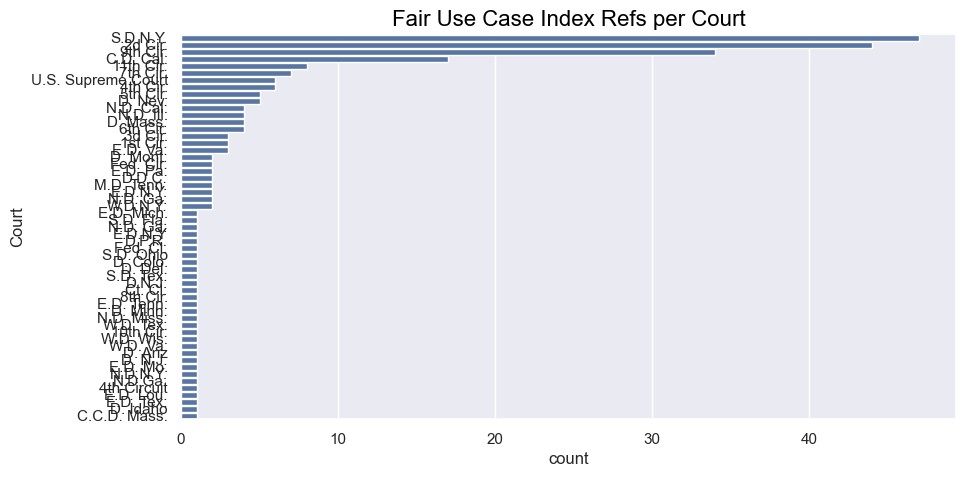

In [18]:
# sns plot on court counts
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs per Court'
sns.countplot(y='Court', data=df, order=df['Court'].value_counts().index).set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs per Category')

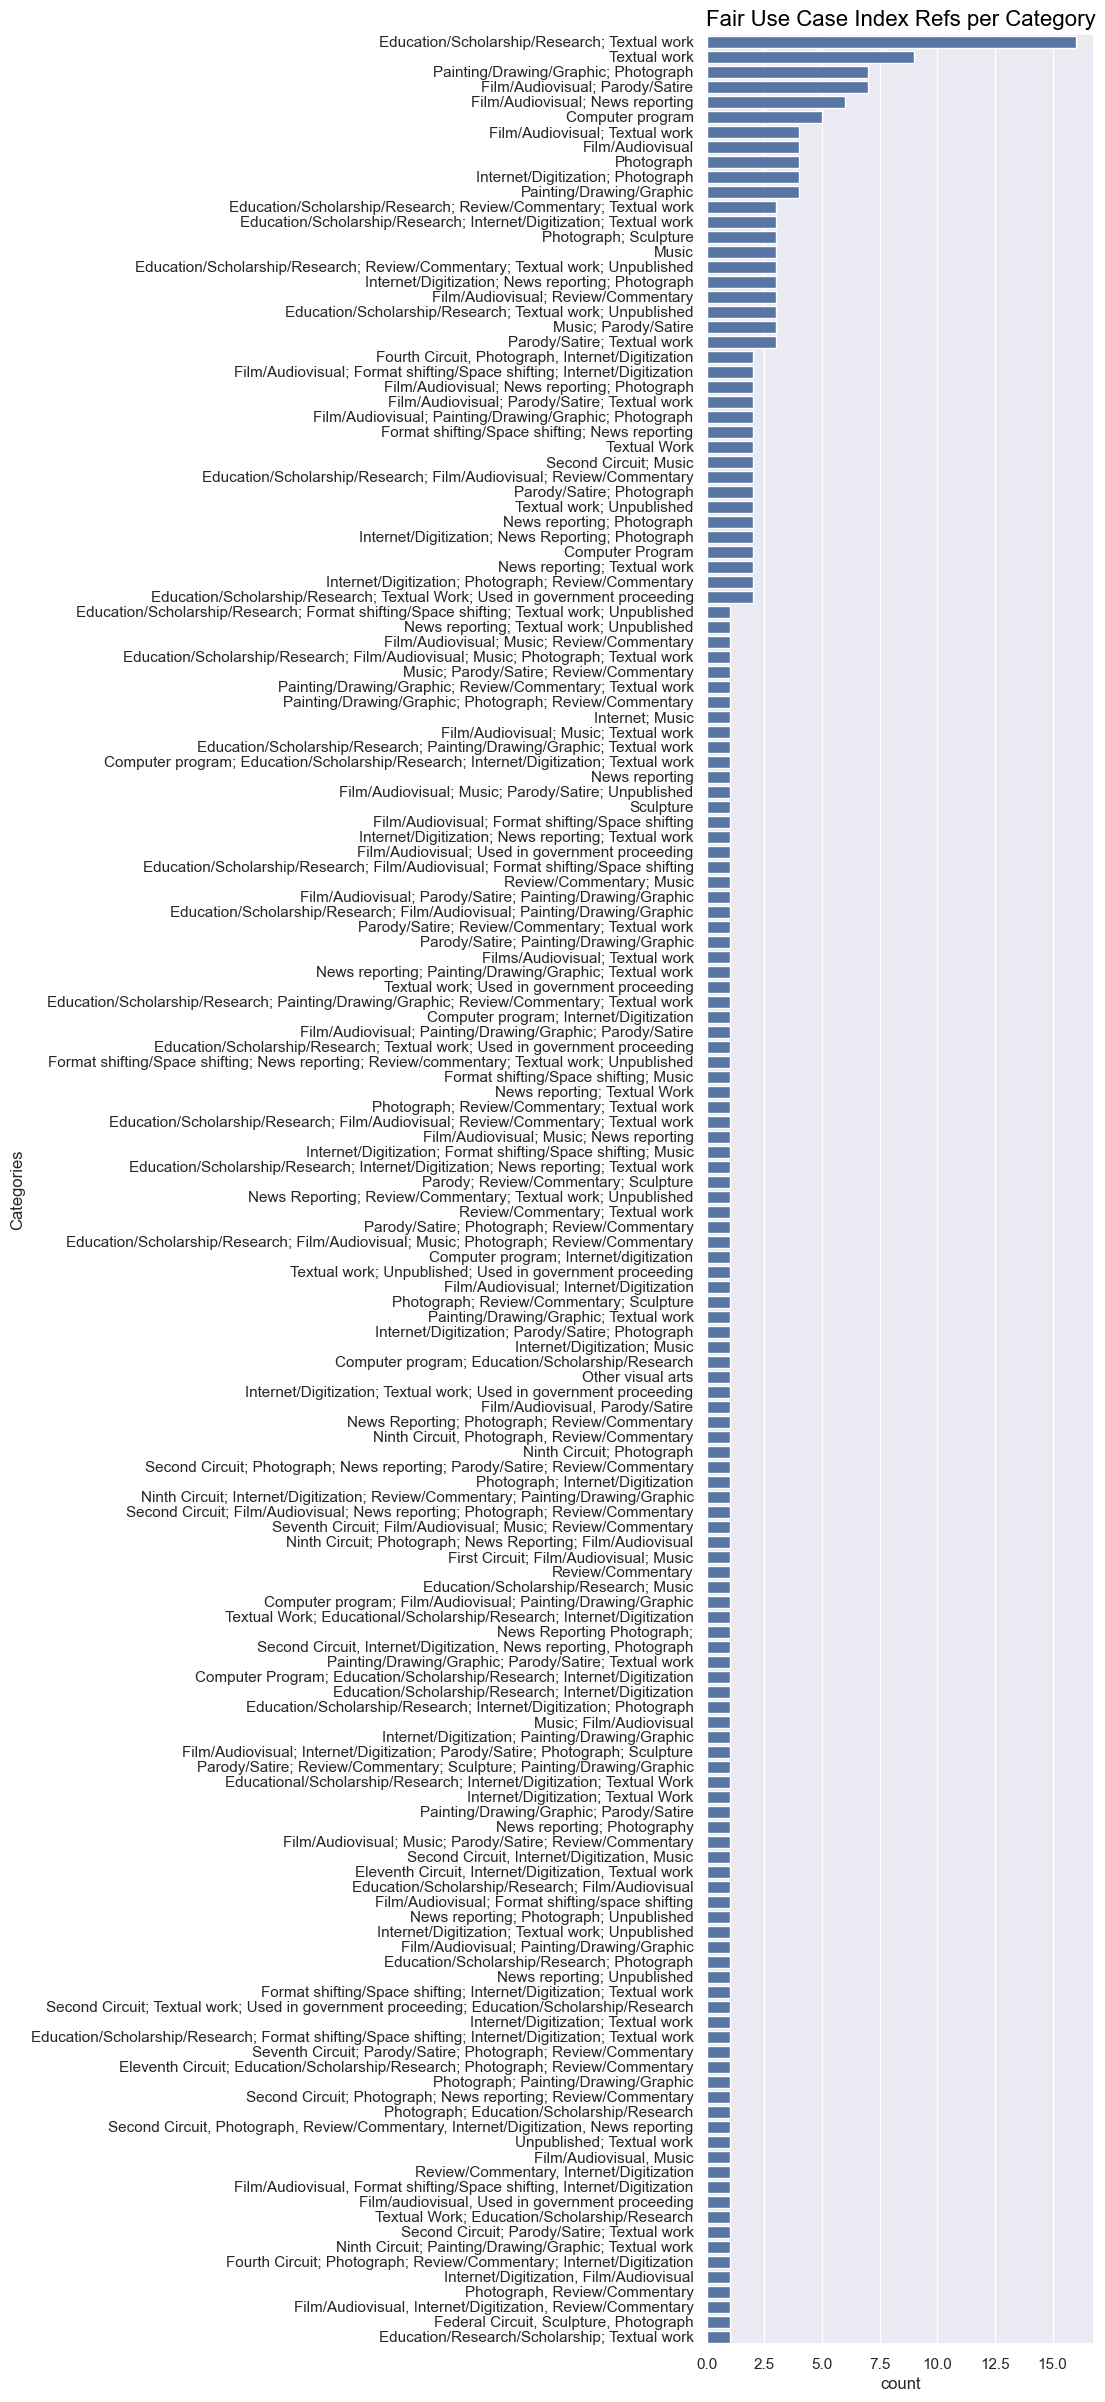

In [19]:
# sns plot on Categories
sns.set(rc={'figure.figsize':(5,30)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs per Category'
sns.countplot(y='Categories', data=df, order=df['Categories'].value_counts().index).set_title(title, fontsize=16, color='black')

In [20]:
df.head(2)

,Case,Year,Court,Jurisdiction,Categories,Outcome,Decade,Main Outcome
0,"Andy Warhol Found. for the Visual Arts, Inc. v...",2023,U.S. Supreme Court,U.S. Supreme Court,Painting/Drawing/Graphic; Photograph,Fair use not found,2020,FAIR USE NOT FOUND
1,"Graham v. Prince, No. 15-CV-10160 (S.D.N.Y. Ma...",2023,S.D.N.Y.,Second Circuit,Painting/Drawing/Graphic; Photograph,Preliminary finding; Fair use not found; Mixed...,2020,FAIR USE NOT FOUND


Text(0.5, 1.0, 'Fair Use Case Index Refs each Decade per Main Outcomes (1950-2025)')

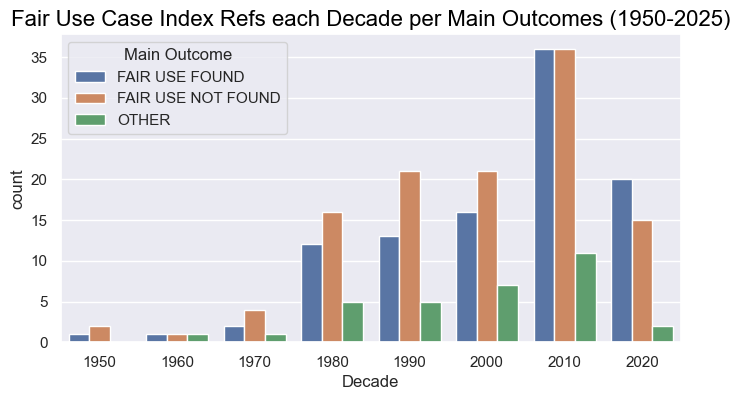

In [ ]:
# sns plot on year value counts with hue as Main Outcome
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes (1950-2025)'
#sns.lineplot(data=df[df['Year'] >= 1950]['Year'].value_counts().sort_index()).set_title(title, fontsize=16, color='black')
sns.countplot(x='Decade', data=df[df['Year'] >= 1950], hue='Main Outcome').set_title(title, fontsize=16, color='black')
# convert that to a line plot with hue as Main Outcome
#sns.lineplot(data=df, x='Decade', y='Count', hue='Main Outcome').set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs each Decade per Main Outcomes')

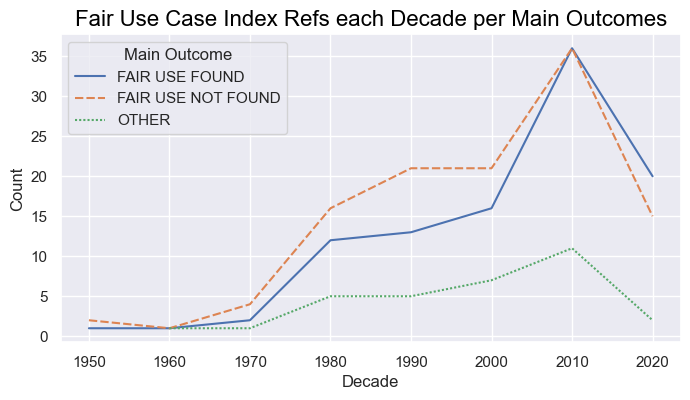

In [75]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Decade', 'Main Outcome']).size().reset_index(name='Count')
# filter for 1950 and later
df_counts = df_counts[df_counts['Decade'] >= 1950]
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes'
sns.lineplot(data=df_counts, x='Decade', y='Count', hue='Main Outcome', style='Main Outcome').set_title(title, fontsize=16, color='black')

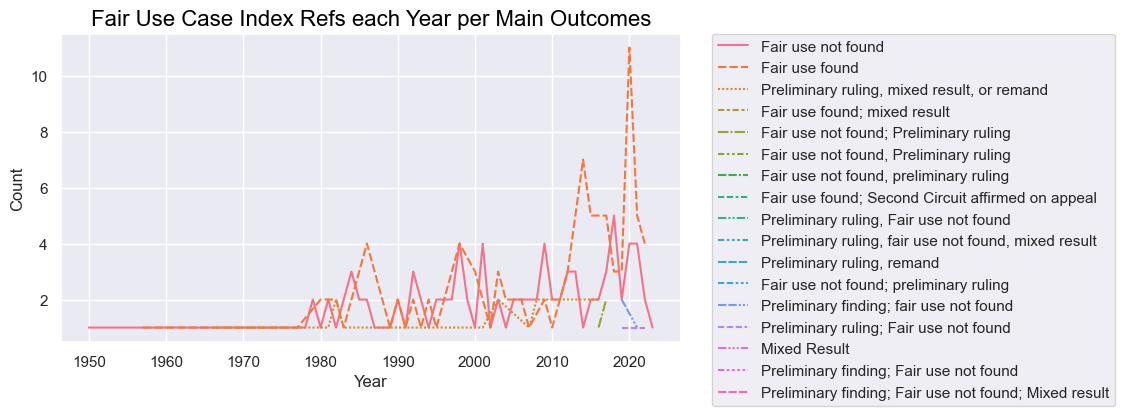

In [80]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Outcome']).size().reset_index(name='Count')
# filter for 1950 and later
df_counts = df_counts[df_counts['Year'] >= 1950]
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Year per Main Outcomes'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Outcome', style='Outcome').set_title(title, fontsize=16, color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

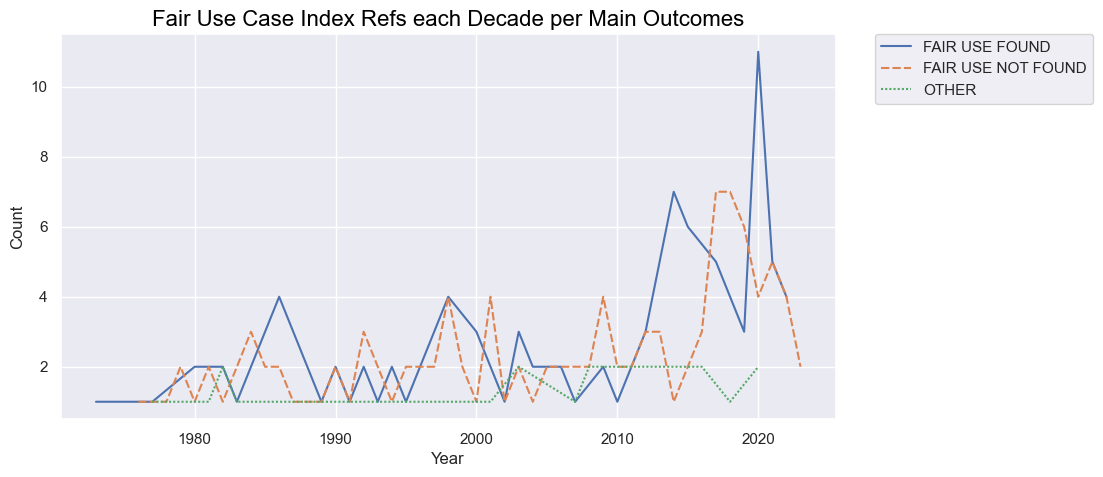

In [81]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Main Outcome']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Main Outcome', style='Main Outcome').set_title(title, fontsize=16, color='black')
# offset the legend so it's not covering the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [90]:
df.head(2)

,Case,Year,Court,Jurisdiction,Categories,Outcome,Decade,Main Outcome
0,"Andy Warhol Found. for the Visual Arts, Inc. v...",2023,U.S. Supreme Court,U.S. Supreme Court,Painting/Drawing/Graphic; Photograph,Fair use not found,2020,FAIR USE NOT FOUND
1,"Graham v. Prince, No. 15-CV-10160 (S.D.N.Y. Ma...",2023,S.D.N.Y.,Second Circuit,Painting/Drawing/Graphic; Photograph,Preliminary finding; Fair use not found; Mixed...,2020,FAIR USE NOT FOUND


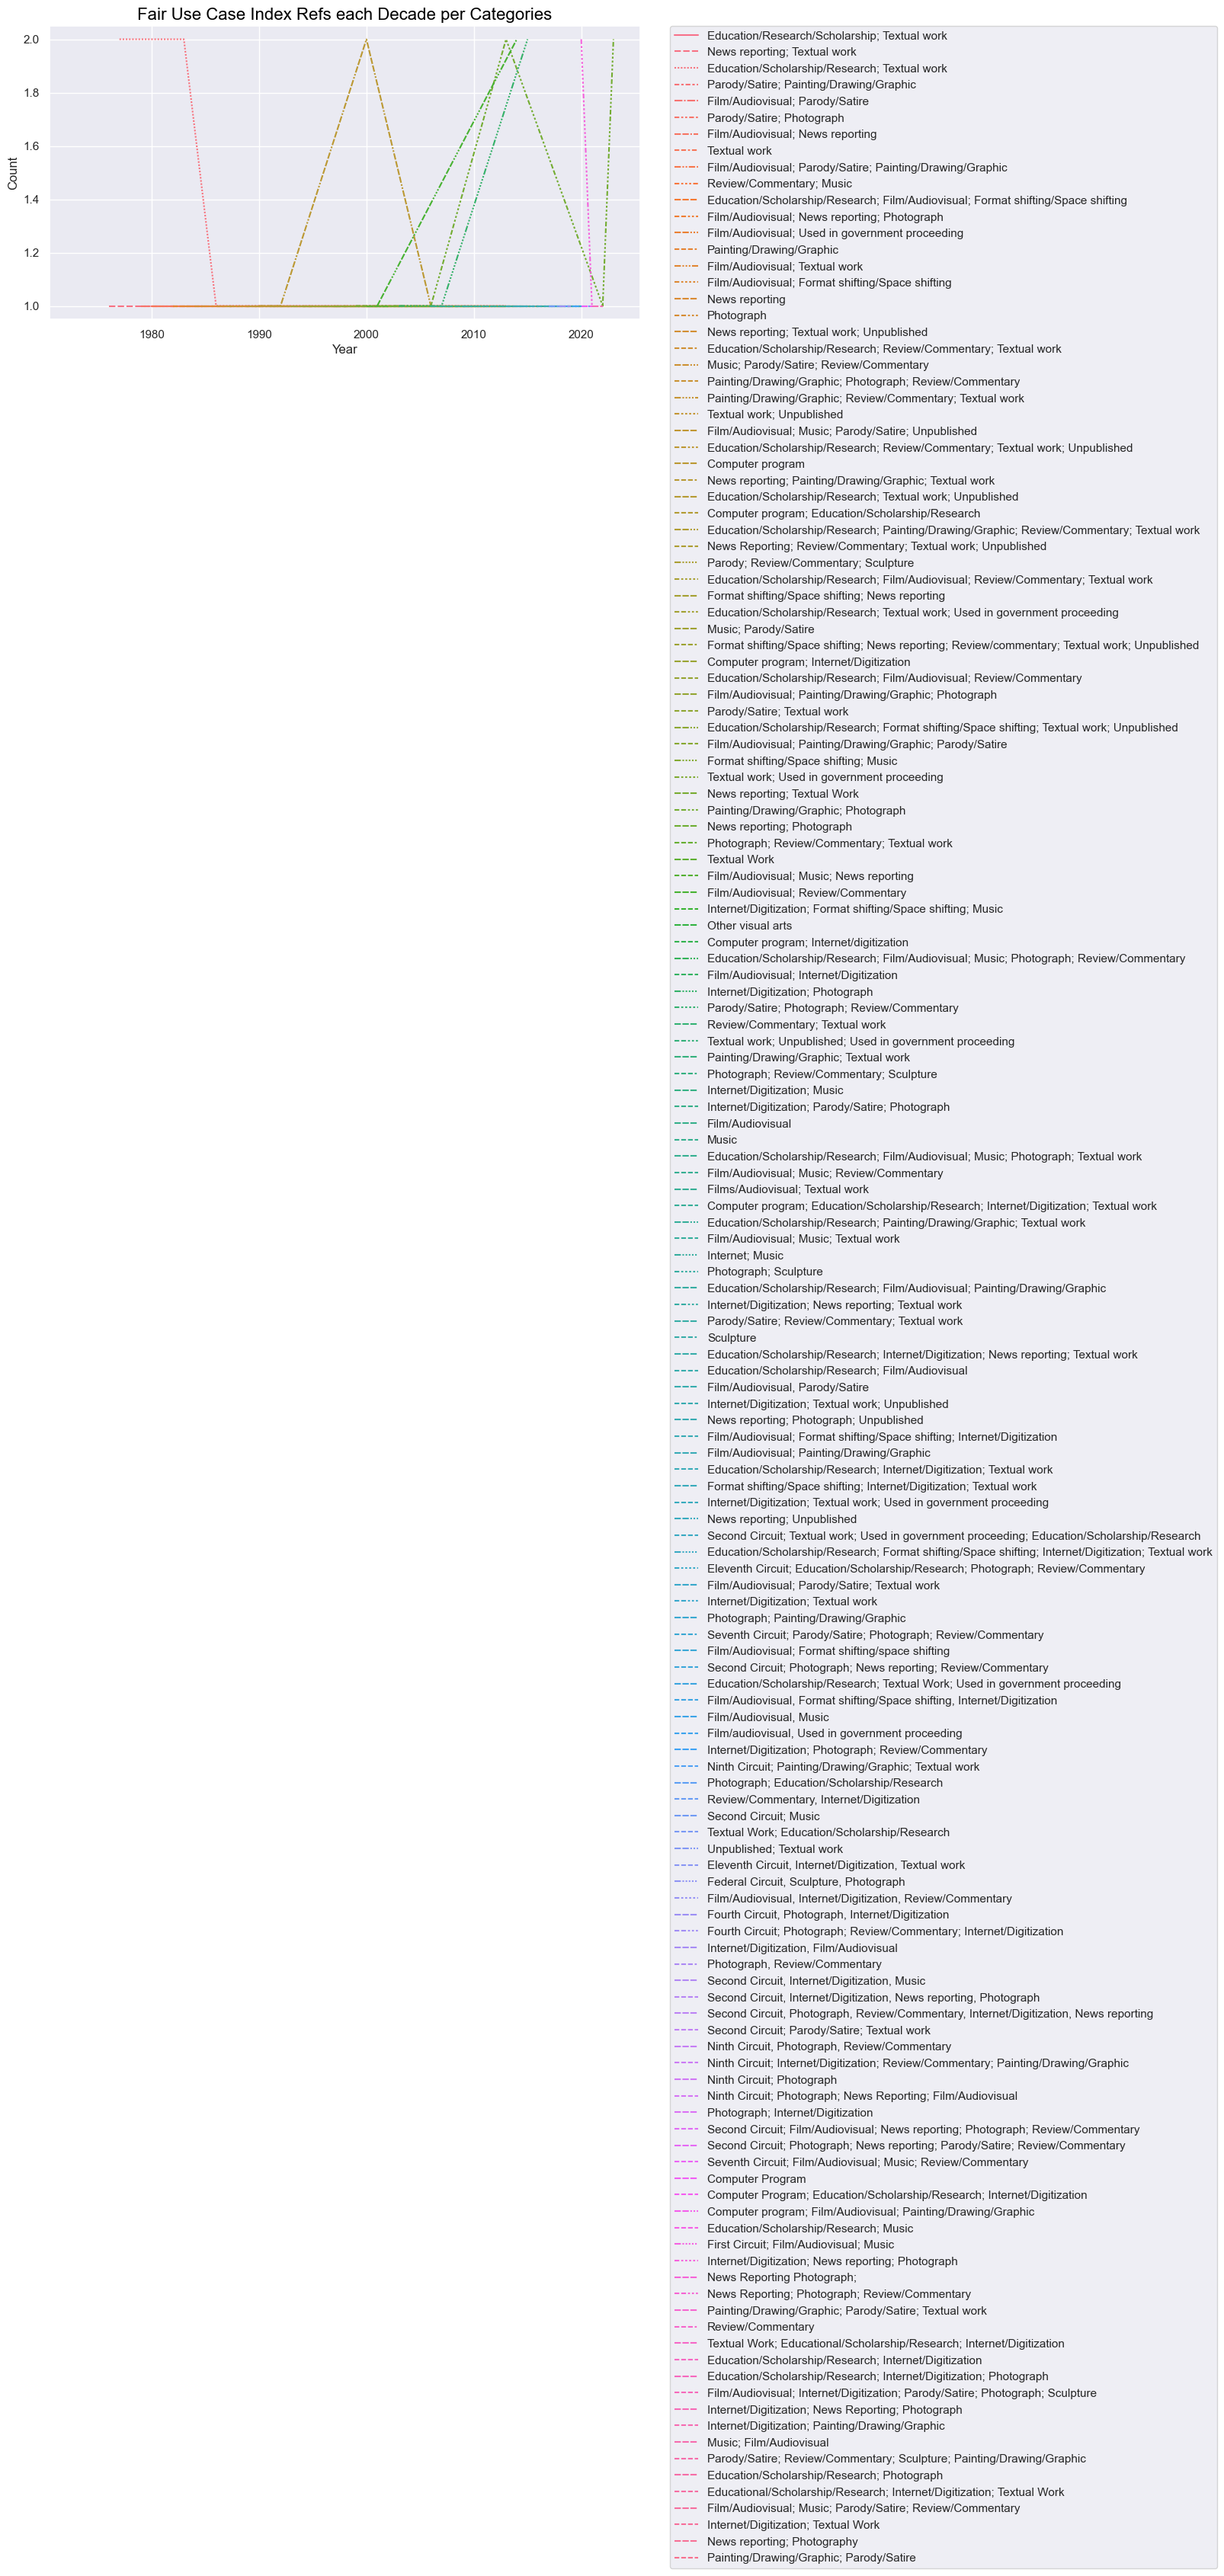

In [91]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Categories']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Categories'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Categories', style='Categories').set_title(title, fontsize=16, color='black')
# offset the legend so it's not covering the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [95]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 9.3 MB/s eta 0:00:00
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.9/311.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 12.3 MB/s eta 0:00:00
  Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
  Using cached idna-3.10-py3-none-any.whl (70 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.4 MB/s eta 0:00:0

In [ ]:
## okay so maybe it's too many categories
# probably need to filter using AI or something to group them into fewer categories
# let's try to group them into fewer categories
# Count occurrences
df_counts = df.groupby(['Year', 'Categories']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]
df_counts
# let's pass each category to a function that will return openai filtered categories
# let's use the openai API to filter the categories
import openai
import os
openai.api_key = 'sk-proj-...'
# let's try to use the openai API to filter the categories
def filter_categories(category):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant. Help me process all the Fair Use Index categories into fewer categories."},
            {"role": "user", "content": category},
        ]
    )
    return response.choices[0].message['content']


In [112]:
filtered_categories = []
for category in df_counts['Categories'].unique():
    filtered_category = filter_categories(category)
    filtered_categories.append(filtered_category)
    print(f'{category} -> {filtered_category}')

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}